In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:

from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 33ms/step - loss: 0.6927 - accuracy: 0.5211 - val_loss: 0.6922 - val_accuracy: 0.5262
Epoch 2/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6905 - accuracy: 0.5826 - val_loss: 0.6887 - val_accuracy: 0.6388
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6839 - accuracy: 0.6556 - val_loss: 0.6771 - val_accuracy: 0.6762
Epoch 4/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6528 - accuracy: 0.6809 - val_loss: 0.6162 - val_accuracy: 0.7180
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5813 - accuracy: 0.7293 - val_loss: 0.5602 - val_accuracy: 0.7352
Epoch 6/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5415 - accuracy: 0.7458 - val_loss: 0.5318 - val_accuracy: 0.7552
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5147 - accuracy: 0.7641 - val_loss: 0.5113 - val_ac

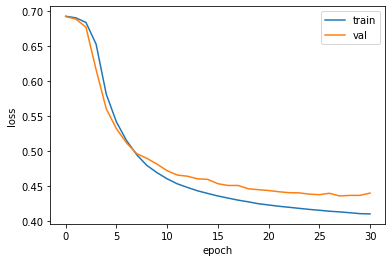

In [5]:

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환 층에 드롭아웃 적용하기

In [6]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout =0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 35ms/step - loss: 0.6927 - accuracy: 0.5207 - val_loss: 0.6921 - val_accuracy: 0.5568
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6910 - accuracy: 0.5807 - val_loss: 0.6900 - val_accuracy: 0.5970
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6879 - accuracy: 0.6220 - val_loss: 0.6859 - val_accuracy: 0.6280
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6808 - accuracy: 0.6464 - val_loss: 0.6762 - val_accuracy: 0.6462
Epoch 5/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6582 - accuracy: 0.6574 - val_loss: 0.6370 - val_accuracy: 0.6564
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6059 - accuracy: 0.7141 - val_loss: 0.5921 - val_accuracy: 0.7302
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5762 - accuracy: 0.7353 - val_loss: 0.5670 - val_ac

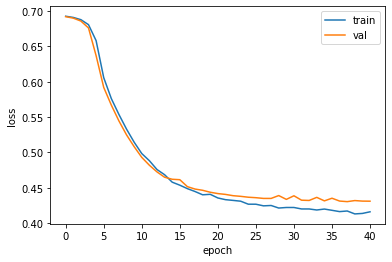

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층을 연결하기

In [9]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout =0.3 , return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout =0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 24s 67ms/step - loss: 0.6927 - accuracy: 0.5282 - val_loss: 0.6923 - val_accuracy: 0.5554
Epoch 2/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6890 - accuracy: 0.5770 - val_loss: 0.6812 - val_accuracy: 0.5786
Epoch 3/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6480 - accuracy: 0.6697 - val_loss: 0.6219 - val_accuracy: 0.6998
Epoch 4/100
313/313 [==============================] - 20s 64ms/step - loss: 0.6031 - accuracy: 0.7071 - val_loss: 0.5836 - val_accuracy: 0.7258
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5721 - accuracy: 0.7293 - val_loss: 0.5540 - val_accuracy: 0.7450
Epoch 6/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5459 - accuracy: 0.7440 - val_loss: 0.5307 - val_accuracy: 0.7518
Epoch 7/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5229 - accuracy: 0.7579 - val_loss: 0.5057 - val_ac

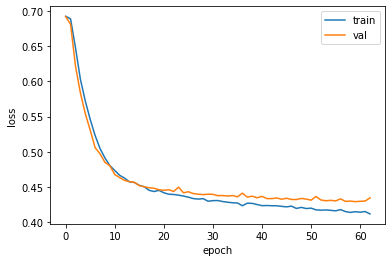

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU

In [12]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 36ms/step - loss: 0.6923 - accuracy: 0.5415 - val_loss: 0.6914 - val_accuracy: 0.5798
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6901 - accuracy: 0.5887 - val_loss: 0.6886 - val_accuracy: 0.6080
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6859 - accuracy: 0.6144 - val_loss: 0.6833 - val_accuracy: 0.6224
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6777 - accuracy: 0.6365 - val_loss: 0.6727 - val_accuracy: 0.6358
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6610 - accuracy: 0.6578 - val_loss: 0.6500 - val_accuracy: 0.6622
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6201 - accuracy: 0.6909 - val_loss: 0.5904 - val_accuracy: 0.7000
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5563 - accuracy: 0.7332 - val_loss: 0.5501 - val_ac

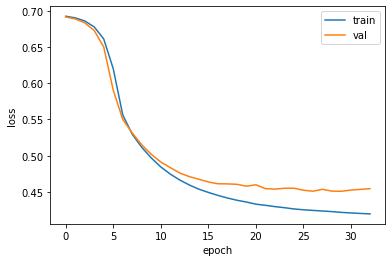

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()